# 📌 Week 3 시계열 데이터 과제

- **구성:** 이론 + 실습  
- **이론:** 정규 세션 핵심 내용 기반 주관식 문제(총 2문제)
- **실습:** ARIMA 모델 & DLinear 모델 활용(총 4문제)
<br><br> 모르는 부분 혹은 문제에 오류가 있는 경우 편하게 연락해주세요:)

## 📖 이론
🔹 정규 세션에서 배운 핵심 개념을 바탕으로 한 **주관식 문제**입니다.  

**Q1**


- 시계열 데이터에서 정상성이 중요한 이유를 말씀해주시고, ARIMA 모델에서는 데이터의 비정상성을 어떻게 처리하는지 설명해주세요.

**A1**

<정상성이 중요한 이유>

ARIMA류 모형은 평균·분산·자기공분산이 시간에 따라 일정하다는 약한 정상성을 전제로 추정치의 불편성과 일관성을 보장하며, 정상성을 만족할 때 예측식의 계수 의미가 시간에 따라 변하지 않아 장기 예측의 안정성이 확보된다.

또한 Ljung–Box 검정이나 t-검정과 같은 진단 및 추론 도구들이 정상성을 기반으로 하기 때문에 모형의 타당성을 검증할 수 있고, 정상성을 확보함으로써 단위근을 가진 비정상 시계열 간의 회귀에서 발생할 수 있는 높은 결정계수(R^2)에도 불구하고 실제로는 관계가 없는 허위회귀 문제를 방지할 수 있다.


<비정상성 처리 방법>

1. 차분(d)을 이용하여 추세성과 단위근(비정상성)을 제거한다. 과도한 차분은 오리혀 분산을 확대하거 MA 단위근을 유발하기 때문에 보통 0~2에서 결정된다.

    $$\text{ARIMA}(p,d,q) : \Phi(B)(1-B)^d y_t=\Theta(B)\varepsilon_t $$

2. 시즌 주기 $s$가 있을 경우에는 $(1-B^s)^D$를 추가하여 계절 차분(D)을 사용한다.

    $$\text{SARIMA}(p,d,q) \times (P, D, Q)_S$$

3. 로그/Box-CoX로 분산을 안정화하여 이분산성을 완화한다.

4. STL등으로 추세/계절 제거 후 ARIMA(잔차)에 적용하여 사전 분해한다.

5. 그래프(추세·분산), ACF의 느린 소멸, ADF/PP(단위근 존재 가설), KPSS(정상성 가설)를 함께 봐서 d/D를 정한다.

**Q2**

- AR(p) 및 MA(q) 모델을 차이점을 중심으로 설명해주세요. 또한, 파라미터 p와 q 결정하는 방법에 대해 상세하게 설명해주세요.

**A2**

AR(p) : 자기회귀 모형 - 과거를 이용해 미래를 예측

$$Y_t = \phi_0 + \phi_1Y_{t-1}+ \cdots + \phi_pY_{t-p}+ \epsilon_t$$

* $\epsilon_t$ : 백색 잡음

    평균이 0, 분산이 $\sigma^2$, 자기공분산이 0, 시계열간 확률적 독립인 경우 : 강백색잡음과정

    백색 잡음 과정이 정규분포를 따르는 경우 : 가우시안 백색잡음과정
    
$p$ 시점 전의 자료가 현재 자료에 영향을 주는 모형


MA(q) : 이동평균 모형 - 예측 오차를 이용하여 미래를 예측하는 모형

$$Y_t = \alpha_t - \theta_1\alpha_{t-1}-\cdots -\theta_p\alpha_{t-p}$$

1차 이동평균모형 : 이동평균모형 중 가장 간단한 모형, 시계열이 같은 시점의 백색잡음과 바로 전 시점의 백색잡음의 결합으로 이루어짐

2차 이동평균모형 : 바로 전 시점의 백색잡음과 시차가 2인 백색잡음의 결합으로 이루어짐

파라미터 p와 q를 결정하는 방법 : ACF 그래프와 PACF 그래프를 그려서 확인

ACF(자기상관함수) : 시차에 따른 일련의 자기상관

시차가 커질수록 ACF는 0에 가까워짐

정상 시계열은 상대적으로 빠르게 0에 수렴하며 비정상 시계열은 천천히 감소하고 종종 큰 양의 값을 가짐

정상성을 판단하는데 유용함

$$ACF(k) = \frac{\displaystyle\sum_{t=1}^{N-k}(y_t-\bar y)(y_{t+k}-\bar y)}{\displaystyle\sum_{t=1}^N(y_t-\bar y)^2}$$

PACF(편자기상관함수) : 시차에 따른 일련의 편자기상관

시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성

$y_t$와 $y_{t-k}$간의 순수한 상관관계로서 두 시점 사이에 포함된 모든 $y_{t-1}, \cdots, y_{t-k+1}$의 형향은 제거됨

$$PACF(k) = Corr(e_t, e_{t-k}) \\ e_t = y_t - (\beta_1y_{t-1}+\cdots +\beta_{k-1}y_{t-(k-1)})$$


Model|ACF|PACF
-|-|-
AR(p)|점차 감소하여 0에 접근|시차 p 이후에 0
MA(q)|시차 q 이후에 0|점차 감소하여 0에 접근



---



## 💻 실습1 ARIMA  
🔹 모의 데이터를 활용한 **ARIMA** 모델 실습입니다. 주어진 데이터를 활용하여 코드 중간중간 주어진 문제에 답해주세요.


### 데이터 전처리

In [ ]:
import pandas as pd

# 데이터 로드
df = pd.read_csv("/content/Time_Series_hw_data_train.csv")
df_eval=pd.read_csv("/content/Time_Series_hw_data_test.csv")

# 데이터 확인
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df = df[["meantemp"]]

df_eval["date"] = pd.to_datetime(df_eval["date"])
df_eval.set_index("date", inplace=True)

# 필요한 컬럼 선택 (meantemp)
df_eval = df_eval[["meantemp"]]

df.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


### 정상성 확인

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 (단위근 검정) 수행
adf_result = adfuller(df["meantemp"])
adf_statistic, p_value = adf_result[0], adf_result[1]


# ADF 검정 결과 출력
adf_statistic, p_value

(-2.02106905592067, 0.27741213723016156)

**Q1**

- 위 결과로부터 데이터가 정상성을 가지는지 답하고, 비정상성을 가진다면 어떤 처리를 할 수 있는지 서술해주세요,<br><br>




**A1**<br><br>
답: 비정상성을 가진다. 따라서 차분 또는 변환&차분을 통해 비정상성을 처리할 수 있다.

In [ ]:
# 차분 진행
df_diff = df.diff().dropna()

# ADF 테스트 (차분 후)
adf_result_diff = adfuller(df_diff["meantemp"])
adf_statistic_diff, p_value_diff = adf_result_diff[0], adf_result_diff[1]

adf_statistic_diff, p_value_diff

(-16.378720267074726, 2.764863137594289e-29)

### ARIMA 하이퍼 파라미터 결정

**Q2**

- 아래 ACF와 PACF Plot으로부터 ARIMA의 하이퍼파라미터인 p와 q를 얼마로 설정해야할지 그 숫자와 근거를 적어주세요. 이후 변수를 선언해주세요.<br><br>

**A2**<br>

p:2    
<br>
이유:  PACF에서 lag 1, lag 2까지 유의미한 spike가 있고 그 이후 거의 0으로 수렴 → p=2 가능성이 높음
<br><br>

q:1
<br>
이유: ACF가 lag 1에서 유의미한 음의 상관, lag 2 이후로 거의 0으로 수렴 → q=1 가능성이 높음

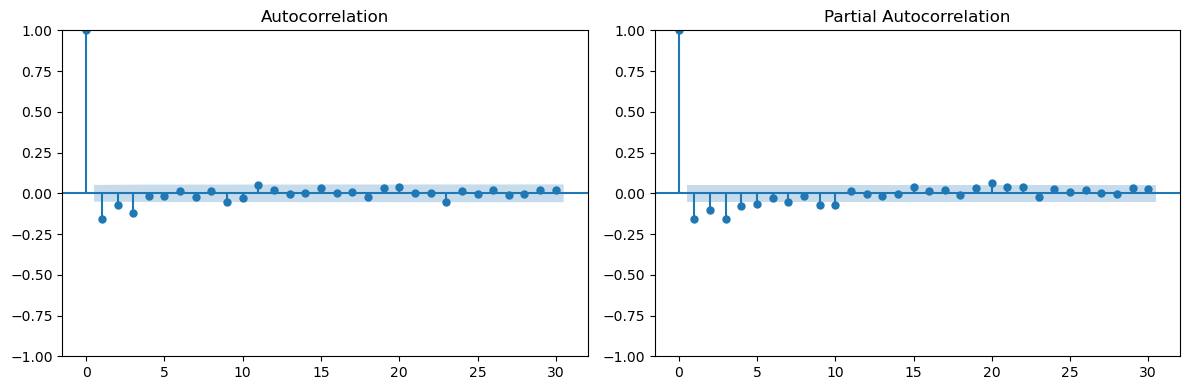

In [ ]:
# ACF와 PACF 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(df_diff["meantemp"], lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_diff["meantemp"], lags=30, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
# 변수 선언

p=2
q=1

### ARIMA 학습

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

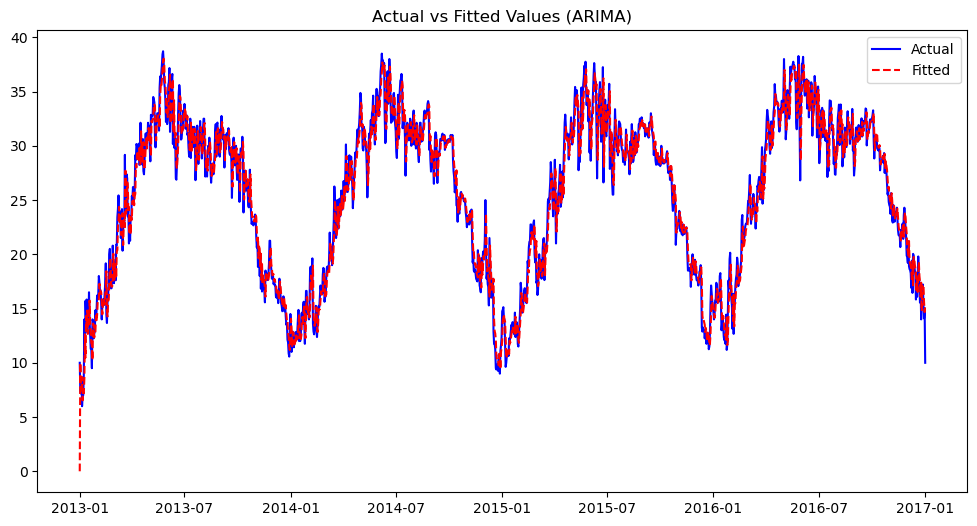

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["meantemp"], order=(p, 1, q))
model_fit = model.fit()

# 예측 수행
df["fitted"] = model_fit.fittedvalues

# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(df["meantemp"], label="Actual", color="blue")
plt.plot(df["fitted"], label="Fitted", color="red", linestyle="dashed")
plt.title("Actual vs Fitted Values (ARIMA)")
plt.legend()
plt.show()

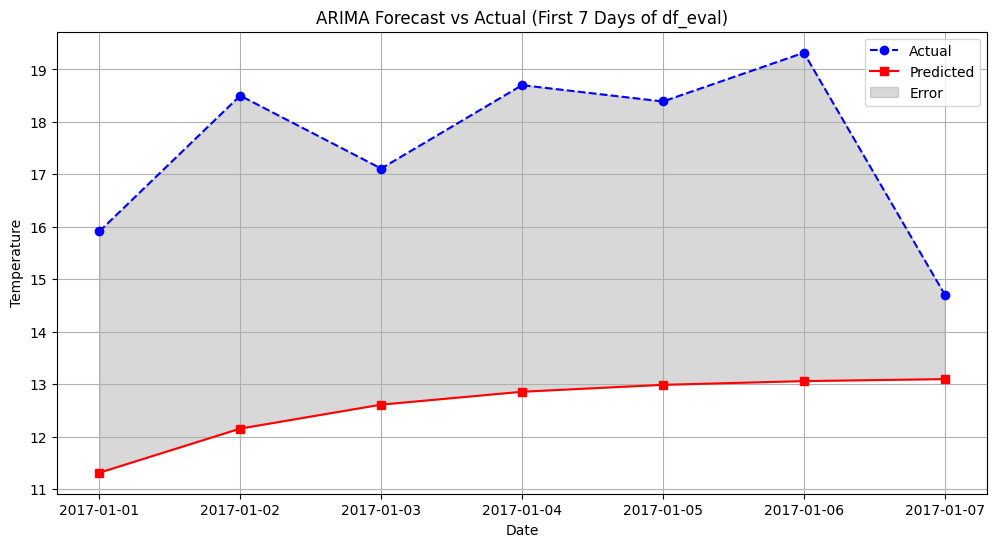

In [ ]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

### AutoARIMA

아래는 자동으로 p,d,q 값을 계산해주는 auto_arima를 사용한 코드입니다.

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df["meantemp"],
                            start_p=0, max_p=5,
                            start_q=0, max_q=5,
                            seasonal=False,
                            trace=True,  # 최적화 과정 출력
                            error_action="ignore",
                            suppress_warnings=True)

# 최적의 (p, d, q) 값 출력
print(f"\n Optimal (p, d, q): {stepwise_model.order}\n")

# 최적의 파라미터로 ARIMA 모델 학습
p, d, q = stepwise_model.order
model = ARIMA(df["meantemp"], order=(p, d, q))
model_fit = model.fit()

# 예측값 저장
df["fitted"] = model_fit.fittedvalues


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


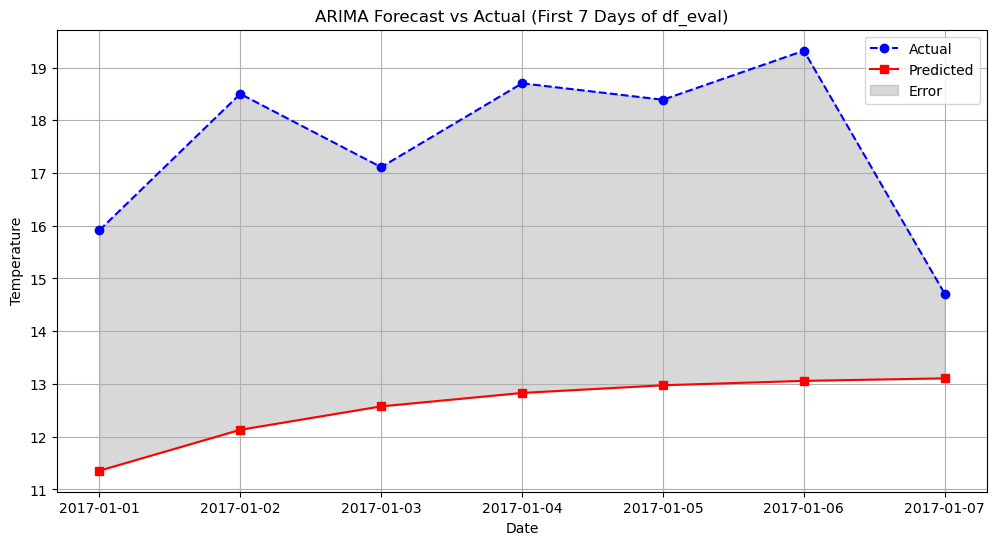

In [ ]:
test_series = df_eval['meantemp'][:7]

forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual", linestyle="dashed", marker="o", color="blue")
plt.plot(test_series.index, forecast, label="Predicted", marker="s", color="red")
plt.fill_between(test_series.index, test_series, forecast, color="gray", alpha=0.3, label="Error")
plt.title("ARIMA Forecast vs Actual (First 7 Days of df_eval)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()



---



## 💻 실습2 Dlinear

In [3]:
import numpy as np
import pandas as pd

# 데이터 로드
train_df = pd.read_csv('/content/Time_Series_hw_data_train.csv')
test_df = pd.read_csv('/content/Time_Series_hw_data_test.csv')

# 날짜 컬럼을 제외한 데이터만 사용
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_values = train_df[features].values.astype(np.float32)
test_values = test_df[features].values.astype(np.float32)

**Q3**

- 30일간의 날씨 데이터를 이용해 7일 동안의 온도, 습도, 풍속, 대기압을 예측하고자 합니다. 아래 코드의 빈칸을 채워주세요. <br><br>


In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

# Sliding Window 전처리
def create_sequences(data, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len + 1):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len:i+seq_len+pred_len])
    return np.array(X), np.array(y)


seq_len = 30
pred_len = 7
X_train, y_train = create_sequences(train_values, seq_len, pred_len)


# PyTorch Dataset 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

/tmp/ipython-input-578948587.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.X = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-578948587.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Dlinear 모델 선언

# 이동 평균을 이용한 추세 추출
class moving_avg(nn.Module):

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

# 시계열 분해
class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean # 데이터에서 추세를 빼면 계절성 부분만 남음
        return res, moving_mean

# 모델
class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.individual = configs['individual'] # 특성마다 다른 선형 회귀를 적용할지 여부
        self.channels = configs['enc_in'] # 입력 및 출력되는 특성 수

        # Decomposition Kernel Size
        kernel_size = configs['kernel_size'] # Kernel: 이동 평균을 계산하기 위한 시간대의 길이
        self.decompsition = series_decomp(kernel_size)

        if self.individual:
            self.Linear_Seasonal = nn.ModuleList()
            self.Linear_Trend = nn.ModuleList()

            for i in range(self.channels):
                self.Linear_Seasonal.append(nn.Linear(self.seq_len, self.pred_len))
                self.Linear_Trend.append(nn.Linear(self.seq_len, self.pred_len))
        else:
            self.Linear_Seasonal = nn.Linear(self.seq_len, self.pred_len)
            self.Linear_Trend = nn.Linear(self.seq_len, self.pred_len)

    def forward(self, x):
        seasonal_init, trend_init = self.decompsition(x)
        seasonal_init, trend_init = seasonal_init.permute(0, 2, 1), trend_init.permute(0, 2, 1)

        if self.individual:
            seasonal_output = torch.zeros([seasonal_init.size(0), seasonal_init.size(1), self.pred_len], dtype=seasonal_init.dtype).to(seasonal_init.device)
            trend_output = torch.zeros([trend_init.size(0), trend_init.size(1), self.pred_len], dtype=trend_init.dtype).to(trend_init.device)

            for i in range(self.channels):
                seasonal_output[:, i, :] = self.Linear_Seasonal[i](seasonal_init[:, i, :])
                trend_output[:, i, :] = self.Linear_Trend[i](trend_init[:, i, :])
        else:
            seasonal_output = self.Linear_Seasonal(seasonal_init)
            trend_output = self.Linear_Trend(trend_init)

        x = seasonal_output + trend_output
        return x.permute(0, 2, 1)

**Q4**

- Dlinear 모델은 kernel, learning rate, individual, epoch 등 여러 하이퍼 파라미터가 존재합니다. 위의 하이퍼 파라미터를 직접 조정하시면서 평균 에러가 가장 낮게 나온 값을 작성해주세요. 마지막으로 ARIMA와 비교하여 어느 모델의 정확도가 더 높은 것 같은지 적어주세요.<br><br>

**A4**<br><br>
Kernel:  35
<br>
learning rate:  0.001
<br>
individual:  Ture
<br>
epoch:70
<br><br>
정확도가 더 높은 모델:ARIMA

In [21]:
# Kernel과 individual의 경우 configs 값을 조정해주세요

configs = {
    'seq_len': seq_len,
    'pred_len': pred_len,
    'individual': True,
    'enc_in': len(features),  # 모든 특성 사용
    'kernel_size': 35
}
model = Model(configs)
optimizer = optim.Adam(model.parameters(), lr=0.001) # learning rate 조절
loss_fn = nn.MSELoss()

# 모델 학습
num_epochs = 70 # epoch 조절
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/70, Loss: 83367.7607
Epoch 2/70, Loss: 11399.1101
Epoch 3/70, Loss: 10994.6051
Epoch 4/70, Loss: 10580.8943
Epoch 5/70, Loss: 10285.6925
Epoch 6/70, Loss: 10020.1617
Epoch 7/70, Loss: 9789.1402
Epoch 8/70, Loss: 9639.8085
Epoch 9/70, Loss: 9440.6105
Epoch 10/70, Loss: 9342.4017
Epoch 11/70, Loss: 9225.9121
Epoch 12/70, Loss: 9119.9481
Epoch 13/70, Loss: 9024.8472
Epoch 14/70, Loss: 8948.8106
Epoch 15/70, Loss: 8930.0369
Epoch 16/70, Loss: 8869.1282
Epoch 17/70, Loss: 8839.5217
Epoch 18/70, Loss: 8815.9103
Epoch 19/70, Loss: 8899.6766
Epoch 20/70, Loss: 8812.2655
Epoch 21/70, Loss: 8737.4596
Epoch 22/70, Loss: 8742.2316
Epoch 23/70, Loss: 8885.1668
Epoch 24/70, Loss: 8781.1944
Epoch 25/70, Loss: 8738.3924
Epoch 26/70, Loss: 8713.8294
Epoch 27/70, Loss: 8738.4480
Epoch 28/70, Loss: 8708.6835
Epoch 29/70, Loss: 8743.4623
Epoch 30/70, Loss: 8714.4448
Epoch 31/70, Loss: 8747.1517
Epoch 32/70, Loss: 8684.0672
Epoch 33/70, Loss: 8728.1068
Epoch 34/70, Loss: 8789.7594
Epoch 35/70, Loss

평균 에러: 5.233402729034424


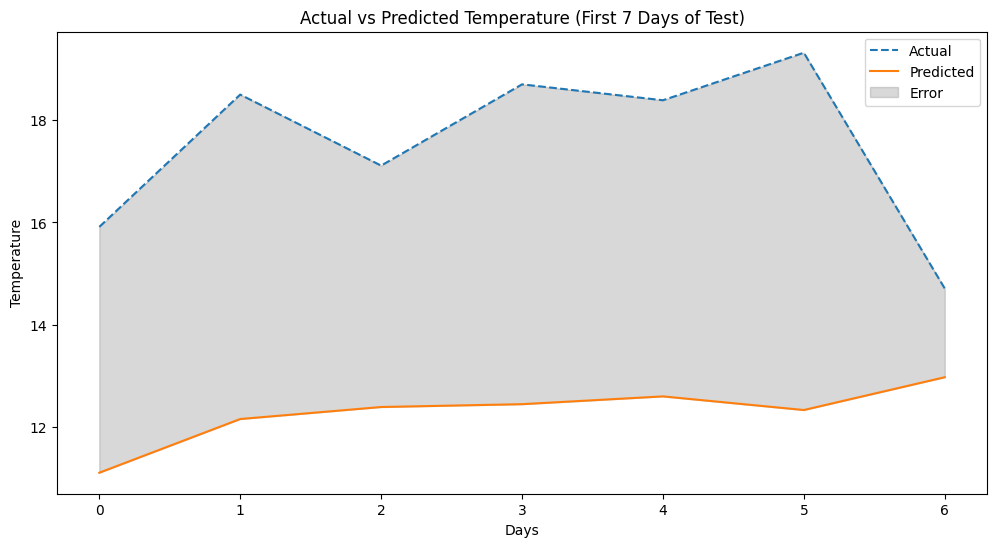

In [22]:
model.eval()
last_30_days = torch.tensor(train_values[-30:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    predictions = model(last_30_days).squeeze().numpy()

# 실제값 (온도만)
actuals = test_values[:7, 0]

# 예측값에서 온도만 선택
predictions_temp = predictions[:, 0]

# 차이 계산
error = actuals - predictions_temp

print(f"평균 에러: {error.mean()}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(7), actuals, label='Actual', linestyle='dashed')
plt.plot(range(7), predictions_temp, label='Predicted')
plt.fill_between(range(7), actuals, predictions_temp, color='gray', alpha=0.3, label='Error')
plt.title('Actual vs Predicted Temperature (First 7 Days of Test)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()